import numpy

In [1]:
import numpy as np

In [2]:
import scipy

In [140]:
import matplotlib.pyplot as plt

def plot_points(points):
    # Create a new figure and axes
    fig, ax = plt.subplots()

    # Plot each point from the dictionary
    for name, position in points.items():
        ax.plot(position[0], position[1], 'o', markersize=10, label=name)

    # Add grid lines
    ax.grid(True)

    # Add legend
    ax.legend()

    # Set x and y axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Set title
    ax.set_title('Points')

    # Show the plot
    #plt.show()
    
    return fig, ax
    

def plot_curve(points, fig=None, ax=None):
    # If figure and axes are not provided, create new ones
    if fig is None or ax is None:
        fig, ax = plt.subplots()

    # Extract x and y coordinates from the points array
    x_coords = points[:, 0]
    y_coords = points[:, 1]

    # Plot the curve
    ax.plot(x_coords, y_coords, 'o-', markersize=5)

    # Add grid lines
    ax.grid(True)

    # Set x and y axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Set title
    ax.set_title('Curve')
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)

    # Show the plot
    plt.show()


# Bezier curves

<img src="bezier_eq.png">

<img src="bezier_quad_eq.png">

In [141]:
def create_linear_bezier_curve(p0, p1, p2, start_t=0, end_t=1, dt=0.01): 
    
    p0 = np.array(p0); p1 = np.array(p1); p2 = np.array(p2)
    
    #print(p0, p1, p2)
    
    # Create p in dimension 1, X
    p0 = p0.reshape(1, p0.shape[0])
    p1 = p1.reshape(1, p1.shape[0])
    p2 = p2.reshape(1, p2.shape[0])
    
    # Create t in dimension X, 1
    N = int((end_t - start_t) / dt)
    t = np.linspace(start_t, end_t, N).reshape(N, 1)
    
    # Bezier curve
    B = (1 - t)*((1 - t) * p0 + t*p1) + t*[(1 - t) * p1 + t*p2]
    
    return B.squeeze()

def create_quadratic_bezier_curve(p0, p1, p2, start_t=0, end_t=1, dt=0.01): 
    
    p0 = np.array(p0); p1 = np.array(p1); p2 = np.array(p2)
    
    #print(p0, p1, p2)
    
    # Create p in dimension 1, X
    p0 = p0.reshape(1, p0.shape[0])
    p1 = p1.reshape(1, p1.shape[0])
    p2 = p2.reshape(1, p2.shape[0])
    
    # Create t in dimension X, 1
    N = int((end_t - start_t) / dt)
    t = np.linspace(start_t, end_t, N).reshape(N, 1)
    
    # Bezier quadratic curve
    Bquad = ((1-t)**2)*p0 + 2*(1-t)*t*p1 + t**2*p2
    
    return Bquad.squeeze()
    
    # Quadratic Bezier Curve
    

# 1st Scenario

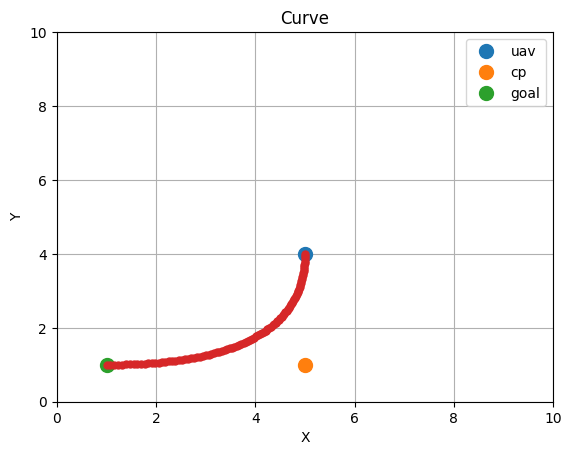

In [142]:
pts_ = {"uav": (5, 4), 
        "cp": (5, 1), 
       "goal": (1, 1)}

fig0, ax0 = plot_points(pts_)
Bquad = create_quadratic_bezier_curve( pts_["uav"], pts_["cp"], pts_["goal"])
plot_curve(Bquad, fig0, ax0)




# 2nd scenario

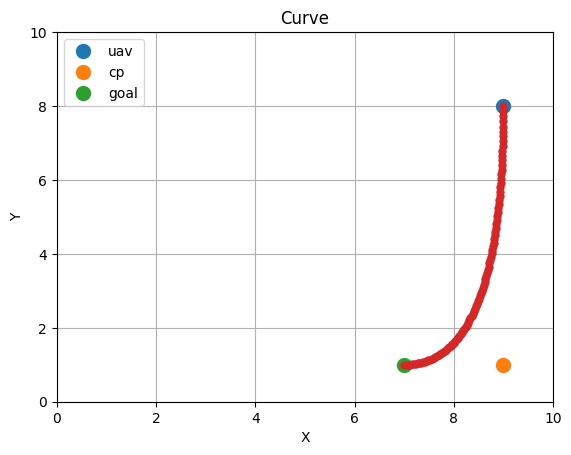

In [144]:
pts_ = {"uav": (9, 8), 
        "cp": (9, 1), 
       "goal": (7, 1)}

fig0, ax0 = plot_points(pts_)
Bquad = create_quadratic_bezier_curve( pts_["uav"], pts_["cp"], pts_["goal"])
plot_curve(Bquad, fig0, ax0)
    

## Two questions arise: 

- How to plan for the net (ARUCO marker, kinematic chain, it is an end effector for which we are planning) 
- Why bezier (nice position profile)--> use that bezier as a input to the MPC tracker?

In [ ]:
plot_points()



In [24]:
1-t

array([[1.        ],
       [0.98989899],
       [0.97979798],
       [0.96969697],
       [0.95959596],
       [0.94949495],
       [0.93939394],
       [0.92929293],
       [0.91919192],
       [0.90909091],
       [0.8989899 ],
       [0.88888889],
       [0.87878788],
       [0.86868687],
       [0.85858586],
       [0.84848485],
       [0.83838384],
       [0.82828283],
       [0.81818182],
       [0.80808081],
       [0.7979798 ],
       [0.78787879],
       [0.77777778],
       [0.76767677],
       [0.75757576],
       [0.74747475],
       [0.73737374],
       [0.72727273],
       [0.71717172],
       [0.70707071],
       [0.6969697 ],
       [0.68686869],
       [0.67676768],
       [0.66666667],
       [0.65656566],
       [0.64646465],
       [0.63636364],
       [0.62626263],
       [0.61616162],
       [0.60606061],
       [0.5959596 ],
       [0.58585859],
       [0.57575758],
       [0.56565657],
       [0.55555556],
       [0.54545455],
       [0.53535354],
       [0.525